---
title: "Mini Challenge: Fourier Transformation"
author: "Sandro Balz, Stefan Binkert, Christoph Elmiger"
date: today
format:
  html:
    toc: true
    toc-location: left
    toc-depth: 3
    number-sections: true
    theme: cosmo
    code-fold: false
    code-tools: True
    fig-responsive: true
    self-contained: true
execute:
  echo: true
  warning: false
  error: true
  freeze: auto

jupyter: python3
---

# Imports

In [86]:
# Benötigte Libraries, Uncommenten für Installation.
#!pip install numpy soundfile librosa matplotlib seaborn scipy

In [87]:
# Basis-Libraries
import numpy as np

# Audioverarbeitung
import soundfile as sf               # Zum Einlesen und Schreiben von Audiodateien (z.B. *.wav)
from IPython.display import Audio    # Für die Wiedergabe von Audiodateien direkt im Jupyter Notebook
import librosa                       # Bibliothek zur Musik- und Audioanalyse (z.B. Laden, Feature-Extraktion)
import librosa.display               # Visualisierungsfunktionen für Audiodaten (z.B. Spektrogramme, Wellenformen)

# Visualisierung
import matplotlib.pyplot as plt      # Plot-Bibliothek für Diagramme, Signale, Bilder etc.
import matplotlib.image as mpimg     # Modul zum Einlesen von Bilddateien (z.B. JPEG, PNG) für plt
import seaborn as sns                # Erweiterte Visualisierungsbibliothek auf Basis von matplotlib mit schöneren Standardlayouts

# Signalverarbeitung & FFT
from scipy.signal import find_peaks  # Findet lokale Maxima in 1D-Daten (z.B. Peaks im Spektrum)
from scipy.fft import (
    fft,         # 1D-FFT: schnelle Fourier-Transformation für 1D-Signale (z.B. Audio)
    fft2,        # 2D-FFT: Fourier-Transformation für 2D-Daten (z.B. Bilder)
    fftfreq,     # Frequenzachsen-Werte passend zur FFT (für Achsenbeschriftung/Analyse)
    fftshift,    # Verschiebt die Nullfrequenz in die Bildmitte (z.B. für Darstellung)
    ifftshift,   # Rückverschiebung: Macht fftshift rückgängig (vor Inverse-FFT)
    ifft,        # Inverse fft: Zurück von Frequenz in Ton (hier)
    ifft2        # Inverse 2D-FFT: Zurück von Frequenz- in Bild-/Raumdarstellung
)

# Aufgabe 1

## 1 a) Fourier-Komponenten

### Aufgabe 

Implementieren Sie mit NumPy eine Methode zur Berechnung der $k$-ten Fourier-Komponente einer Funktion, gegeben durch Arrays $x$ und $y$, mithilfe der Trapezregel (`np.trapezoid`).

### Mathematischer Hintergrund

Die Fourier-Koeffizienten $c_k$ beschreiben die Amplituden der harmonischen Bestandteile einer periodischen Funktion $f(x)$. Für eine Funktion, die auf dem Intervall $[-L, L]$ definiert ist und periodisch mit Periode $2L$ fortgesetzt wird, berechnen sich die Koeffizienten nach folgender Formel:

$$c_k = \frac{1}{2L} \int_{-L}^{L} f(x) \cdot e^{-i k \pi x / L} \, dx \quad \text{für alle } k \in \mathbb{Z}
$$

Diese Formulierung ist äquivalent zur klassischen Fourier-Reihe, jedoch mit einer leicht anderen Skalierung der Exponentialfunktion. Sie ist besonders geeignet, wenn man das Intervall $[-L, L]$ direkt verwendet und auf eine numerische Umsetzung mit festen Stützstellen zielt.

### Umsetzung in Python

Die Berechnung dieses Integrals erfolgt numerisch mit der Trapezregel. Die Funktion fourier_komponente(...) verwendet NumPy und erwartet:
- ein Array $x$ mit den Stützstellen im Intervall $[-L, L]$
- ein Array $y$ mit den entsprechenden Funktionswerten $f(x)$
- einen ganzzahligen Index $k$ der Fourier-Komponente
- den Parameter $L$, also die halbe Periodenlänge

### Bewertungskriterien

1) Die k-ten Fourier-Komponenten wurden korrekt und nachvollziehbar implementiert.

*Funktion fourier_komponente()*

In [88]:
def fourier_komponente(x, y, k, L):
    """
    Berechnet die k-te Fourier-Komponente einer Funktion f(x), gegeben durch
    die Stützstellen x und Funktionswerte y = f(x), mit der Trapezregel.

    Parameters:
        x (ndarray): Array mit Stützstellen im Intervall [-L, L]
        y (ndarray): Array mit Funktionswerten f(x)
        k (int): Index der Fourier-Komponente (k ∈ ℤ)
        L (float): Halbe Periodenlänge des Intervalls (z.B. bei [-3, 3] ist L = 3)

    Returns:
        c_k (complex): k-te Fourier-Komponente
    """
    integrand = y * np.exp(-1j * k * np.pi * x / L)
    c_k = (1 / (2 * L)) * np.trapezoid(integrand, x)
    return c_k

## 1 b) Fourier Approximation

### Aufgabe

Implementieren Sie mit numpy eine Methode zur Berechnung der Fourier-Approximation $f_{app}$ mit einer gegebenen Anzahl ($m$) von Frequenzkomponenten.

Mathematischer Hintergrund

Die Fourier-Approximation $f_{\text{app}}(x)$ ist eine Summe komplexer Exponentialfunktionen, die eine periodische Funktion $f(x)$ auf dem Intervall $[-L, L]$ durch $2m + 1$ Fourier-Komponenten annähert. Die Approximation lautet:

$$
f_{\text{app}}(x) = \sum_{k=-m}^{m} c_k \cdot e^{i k \pi x / L}
$$

wobei die Koeffizienten $c_k$ durch die zuvor definierte Formel berechnet werden:

$$
c_k = \frac{1}{2L} \int_{-L}^{L} f(x) \cdot e^{-i k \pi x / L} \, dx
$$

Durch die Summation über positive und negative Frequenzen entsteht eine symmetrische Rekonstruktion, die sowohl die gleichanteilige als auch die schwingenden Anteile der Funktion berücksichtigt.

### Umsetzung in Python

Die folgende Funktion `fourier_approximation(...)` berechnet die Näherung $f_{\text{app}}(x)$ aus den diskreten Werten $x$ und $f(x) = y$. Für jede Frequenzkomponente $k \in [-m, m]$ wird der entsprechende Fourier-Koeffizient berechnet und zum Approximationssignal addiert.

### Bewertungskriterien

2) Die Fourier-Approximation wurde korrekt und nachvollziehbar implementiert.

*Funktion fourier_approximation()*

In [89]:
def fourier_approximation(x, y, m, L):
    """
    Berechnet die Fourier-Approximation f_app(x) mit 2m + 1 Komponenten.

    Parameters:
        x (ndarray): Stützstellen x im Intervall [-L, L]
        y (ndarray): Funktionswerte f(x)
        m (int): Maximale Frequenzkomponente (Symmetrisch um 0)
        L (float): Halbe Periodenlänge

    Returns:
        f_app (ndarray): Approximierte Funktion an den Punkten x
    """
    f_app = np.zeros_like(x, dtype=complex)
    for k in range(-m, m + 1):
        c_k = fourier_komponente(x, y, k, L)
        f_app += c_k * np.exp(1j * k * np.pi * x / L)
    return np.real(f_app)

## 1c) Näherung der Funktion $f_1(x)$ mit Fourier-Approximation

### Aufgabe

Nähern Sie die Funktion $f_1(x) = \frac{1}{e^x + e^{-x}} = \mathrm{sech}(x)$ auf dem Intervall $[-3, 3]$ mit verschiedenen Anzahlen von Komponenten $(2m + 1)$. Plotten Sie den Vergleich zur Originalfunktion $f(x)$.

### Ziel

Ziel dieser Teilaufgabe ist es, den Einfluss der Anzahl der verwendeten Frequenzkomponenten auf die Qualität der Fourier-Approximation zu untersuchen. Die zu approximierende Funktion $f_1(x)$ ist glatt und fällt rasch gegen Null – sie eignet sich daher gut zur Demonstration der Konvergenzverhalten der Fourier-Reihe.

### Visualisierung der Approximation für verschiedene $m$

Die folgende Grafik zeigt die Fourier-Approximationen für $m = 1, 2, 3, 4, 5, 7, 10, 20$ im Vergleich zur Originalfunktion $f_1(x)$. Die Approximation wurde mit der zuvor implementierten Methode `fourier_approximation(...)` berechnet. 

Die Plots sind in einem übersichtlichen Grid-Layout dargestellt:

- Die gestrichelte schwarze Linie zeigt jeweils die Originalfunktion $\mathrm{sech}(x)$.
- Die farbige Kurve zeigt die jeweilige Fourier-Näherung mit $2m + 1$ Komponenten.
- Es ist deutlich zu erkennen, dass die Approximation mit zunehmendem $m$ immer besser wird – besonders in der Mitte des Intervalls.

### Bewertungskriterien

3) Die Plots der Funktionen und berechneten Approximationen sind korrekt, verständlich und kompakt.

*Plots erfüllen alle drei Anforderungen. Bei Bedarf kann Parameter m_values angepasst werden um Plots für andere m zu generieren. Falls die Plots zu klein sind: Parameter cols reduzieren.*

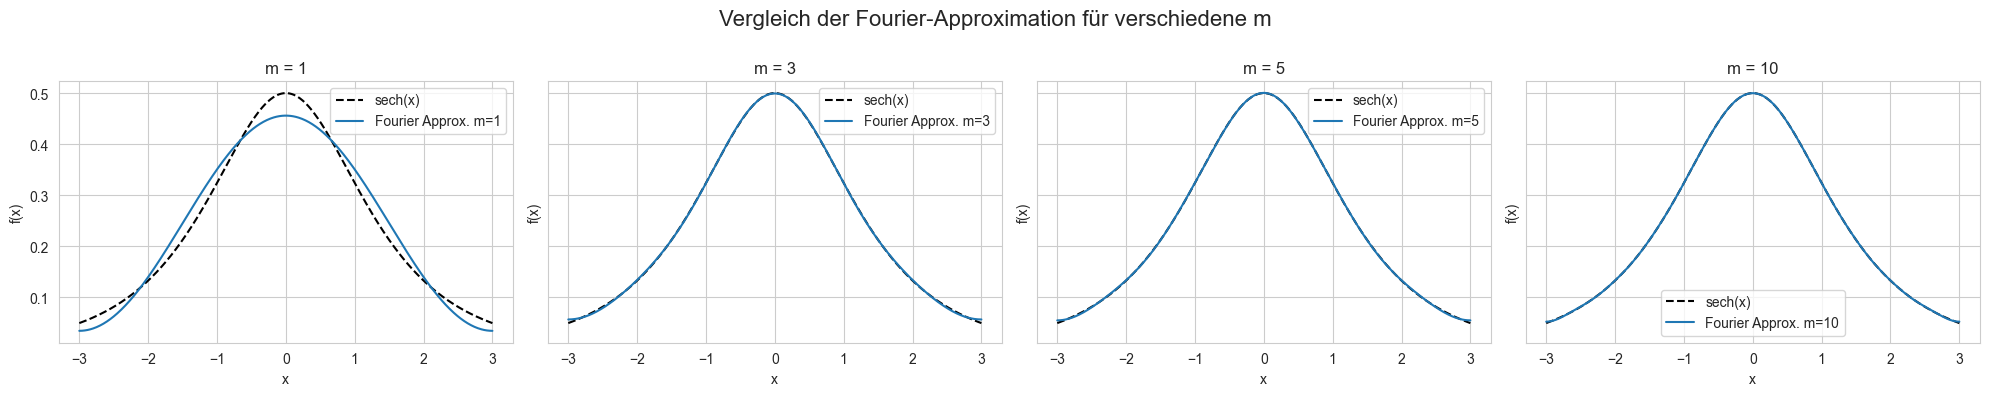

In [90]:
def f1(x):
    return 1 / (np.exp(x) + np.exp(-x))

def plot_fourier_approximation(
        f, 
        L=3, 
        N=600, 
        m_values=[1, 3, 5, 10],
        f_label="Original f(x)", 
        cols=4,
        top=.8):
    """
    Plottet die Fourier-Approximation einer Funktion f(x) für verschiedene m-Werte in einem Grid.

    Parameters:
        f (callable): Die zu approximierende Funktion
        L (float): Halbe Periodenlänge
        N (int): Anzahl der Stützstellen
        m_values (list): Liste von m-Werten für die Approximation
        f_label (str): Beschriftung der Originalfunktion im Plot
    """
    x = np.linspace(-L, L, N)
    y = f(x)

    num_plots = len(m_values)
    rows = (num_plots + cols - 1) // cols  # Rundet auf

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
    axes = axes.flatten()  # Zum einfachen Zugriff auf alle Subplots

    for i, m in enumerate(m_values):
        f_app = fourier_approximation(x, y, m, L)
        ax = axes[i]
        ax.plot(x, y, label=f_label, color="black", linestyle="--")
        ax.plot(x, f_app, label=f"Fourier Approx. m={m}")
        ax.set_title(f"m = {m}")
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
        ax.grid(True)
        ax.legend()

    # Verstecke nicht genutzte Subplots (falls m_values < rows*cols)
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    fig.suptitle("Vergleich der Fourier-Approximation für verschiedene m", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=top)  # Platz für Suptitle
    plt.show()


        
plot_fourier_approximation(lambda x: 1 / (np.exp(x) + np.exp(-x)), f_label="sech(x)")

## 1d) Bestimmung der minimalen Anzahl von Komponenten

### Aufgabe

Bestimmen Sie die Anzahl der Fourier-Komponenten $m$, die nötig ist, um eine Approximation mit einem relativen Fehler von höchstens 0{,}1% zu erreichen.

### Fehlermass

Der relative Fehler wird über die normierte Differenz der Funktionswerte berechnet:

$$
\text{rel. Fehler} = \frac{ \| f_{\text{orig}} - f_{\text{approx}} \|_2 }{ \| f_{\text{orig}} \|_2 }
$$

Dabei bezeichnet $\|\cdot\|_2$ die euklidische Norm (L2-Norm), ein Standardmass für die Genauigkeit numerischer Approximationen.

### Vorgehen

Zur Bestimmung des minimal notwendigen $m$ wird die Funktion `finde_minimales_m(...)` verwendet. Sie berechnet sukzessive Fourier-Approximationen für $m = 1$ bis $m_{\text{max}}$ und prüft, wann der relative Fehler unter die Zielgrenze von 0{,}1% fällt.

Die Funktion gibt das gefundene minimale $m$ zurück und zeigt optional den Fehlerverlauf grafisch an. Dies liefert einen guten Eindruck von der Konvergenzgeschwindigkeit der Fourier-Reihe.

### Bewertungskriterien

4) Der relative Fehler wurde korrekt definiert, in Latex gerendert und implementiert.

*Siehe Abschnitt Fehlermass*

5) Die erforderliche Anzahl der Fourier-Komponenten für einen relativen Fehler von höchstens 0,1 % wurde korrekt bestimmt.

*Siehe Output Codezeile: `Minimales m mit Fehler < 0.10%: m = 13`*

Minimales m mit Fehler < 0.10%: m = 13


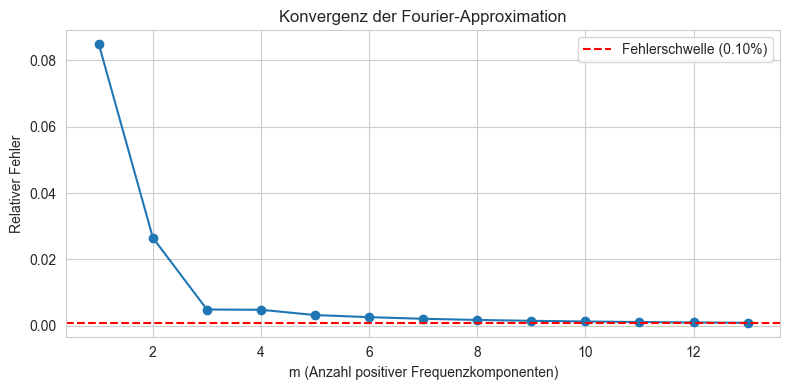

In [91]:
def finde_minimales_m(f, L=3, N=600, target_error=0.001, m_max=100, plot=True):
    """
    Bestimmt die kleinste Anzahl an Fourier-Komponenten m, sodass der relative Fehler
    der Fourier-Approximation unterhalb eines gegebenen Schwellenwerts liegt.

    Parameters:
        f (callable): Die zu approximierende Funktion f(x)
        L (float): Halbe Periodenlänge des Intervalls [-L, L]
        N (int): Anzahl der Stützstellen
        target_error (float): Fehlerschwelle (z. B. 0.001 für 0.1%)
        m_max (int): Maximales m, das getestet werden soll
        plot (bool): Ob der Fehlerverlauf geplottet werden soll

    Returns:
        m_opt (int): Kleinstes m mit Fehler < target_error
    """
    x = np.linspace(-L, L, N)
    y = f(x)

    def relative_fehler(f_orig, f_approx):
        return np.linalg.norm(f_orig - f_approx) / np.linalg.norm(f_orig)

    fehler_liste = []
    m_liste = []

    m_opt = None
    for m in range(1, m_max + 1):
        f_app = fourier_approximation(x, y, m, L)
        fehler = relative_fehler(y, f_app)
        fehler_liste.append(fehler)
        m_liste.append(m)
        if fehler < target_error and m_opt is None:
            m_opt = m
            break

    if m_opt is not None:
        print(f"Minimales m mit Fehler < {target_error * 100:.2f}%: m = {m_opt}")
    else:
        print("Kein m mit genügend kleinem Fehler gefunden.")

    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(m_liste, fehler_liste, marker='o')
        plt.axhline(y=target_error, color='r', linestyle='--', label=f'Fehlerschwelle ({target_error*100:.2f}%)')
        plt.xlabel("m (Anzahl positiver Frequenzkomponenten)")
        plt.ylabel("Relativer Fehler")
        plt.title("Konvergenz der Fourier-Approximation")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return m_opt

_ = finde_minimales_m(f1)

Minimales m mit Fehler < 0.10%: m = 13


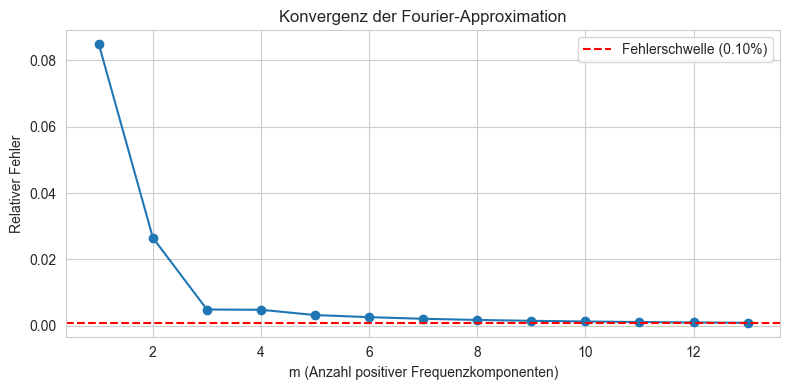

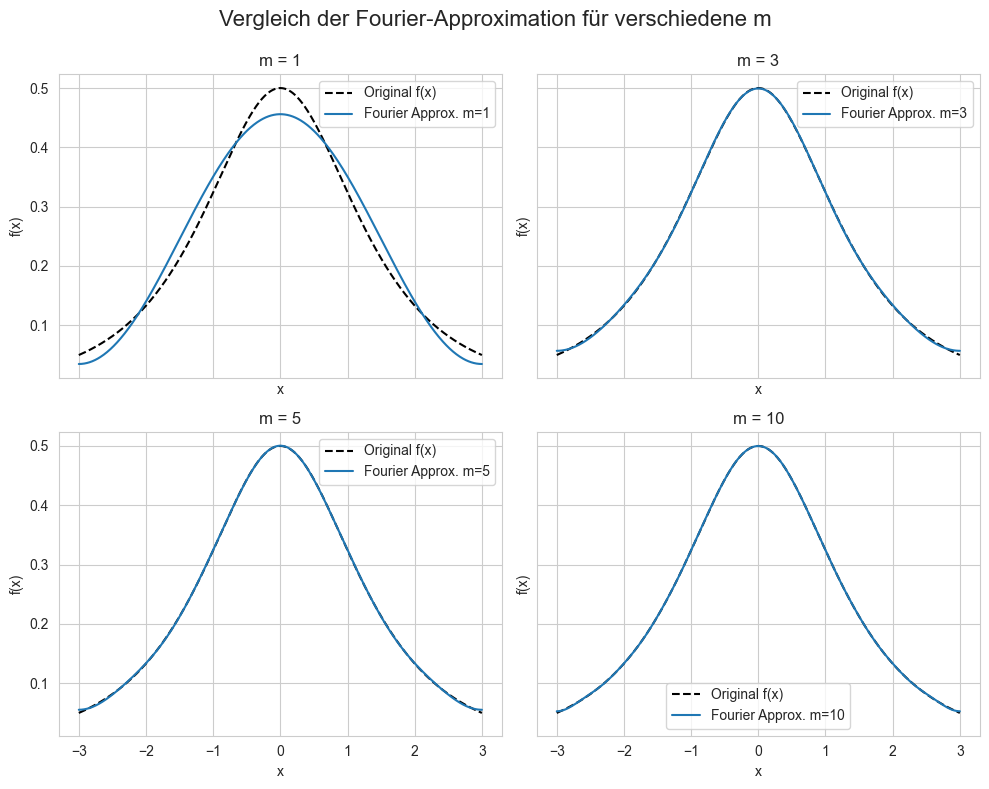

In [92]:
_ = finde_minimales_m(f1)

plot_fourier_approximation(f1, m_values=[1, 3, 5, 10], cols=2, top=.9)

## 1e) Fourier-Approximation der Funktionen $f_2(x) = e^x$ und $f_3(x) = e^{|x|}$

### Aufgabe

Versuchen Sie, die Funktionen
- $f_2(x) = e^x$ und
- $f_3(x) = e^{|x|}$

auf dem Intervall $[-3, 3]$ mit einer Fourier-Approximation so zu nähern, dass der relative Fehler unter 0{,}1% bleibt.

Verwenden Sie dabei dieselbe Methode wie zuvor (Aufgabe 1d), also die Funktion `finde_minimales_m(...)`.

### Ergebnisse

- Für $f_2(x) = e^x$ wurde kein Wert von $m$ bis $100$ gefunden, der zu einem relativen Fehler unter 0{,}1% führt.
- Für $f_3(x) = e^{|x|}$ wurde bei $m = 93$ der Ziel-Fehler von 0{,}1% unterschritten.
    

### Interpretation & Vergleich

Diese Ergebnisse zeigen, wie stark die mathematischen Eigenschaften einer Funktion die Konvergenz der Fourier-Reihe beeinflussen: 

#### $f_2(x) = e^x$

- Diese Funktion ist nicht periodisch, nicht symmetrisch und monoton wachsend.
- Beim Übergang von $x = L$ nach $x = -L$ (also beim Umsprung der periodischen Fortsetzung) entsteht ein grosser Sprung in den Funktionswerten.
- Dieser Sprung führt zu starken Diskontinuitäten in der periodischen Fortsetzung, wodurch viele hochfrequente Anteile nötig sind, um die Funktion zu approximieren.
- Innerhalb des getesteten Bereichs ($m \leq 100$) reicht die Approximation deshalb nicht aus, um den Ziel-Fehler zu unterschreiten.

#### $f_3(x) = e^{|x|}$

- Diese Funktion ist symmetrisch um $x = 0$ und fällt zu beiden Seiten hin exponentiell ab.
- Zwar ist sie an der Stelle $x = 0$ nicht differenzierbar, aber ihre periodische Fortsetzung ist insgesamt wesentlich glatter als die von $f_2$.
- Dadurch kann sie bereits mit moderater Anzahl von Frequenzkomponenten (hier: $m = 93$) gut approximiert werden.

### Fazit

Der Vergleich zeigt deutlich:
- Funktionen mit Sprungstellen, starker Asymmetrie oder nicht-periodischem Verhalten (wie $e^x$) sind mit der Fourier-Reihe nur sehr langsam und schlecht approximierbar.
- Funktionen, die symmetrisch, glatt oder zumindest stetig sind (wie $e^{|x|}$), lassen sich mit deutlich weniger Komponenten gut annähern.
- Die Glattheit und Periodizität der Funktion (bzw. ihrer periodischen Fortsetzung) sind entscheidend für die Konvergenzgeschwindigkeit der Fourier-Approximation.

### Bewertungskriterien

6) Die Unterschiede in den Approximationen der verschiedenen Funktionen wurden korrekt und verständlich beschrieben und erklärt.

*Siehe Abschnitt Interpretation & Vergleich, sowie Visualisierungen*

Visualisierungen für f(x) = e^x
Kein m mit genügend kleinem Fehler gefunden.


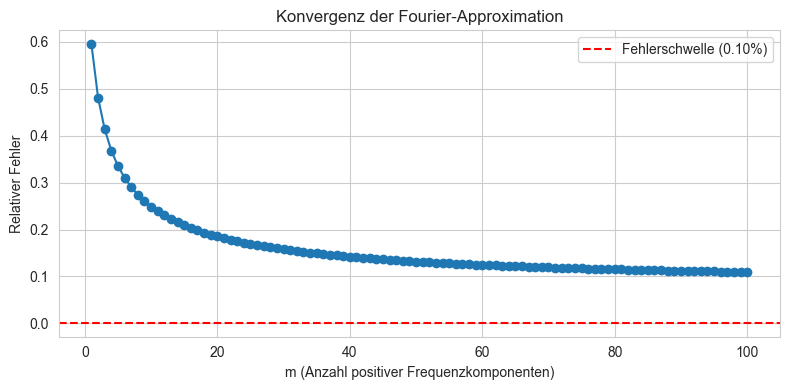

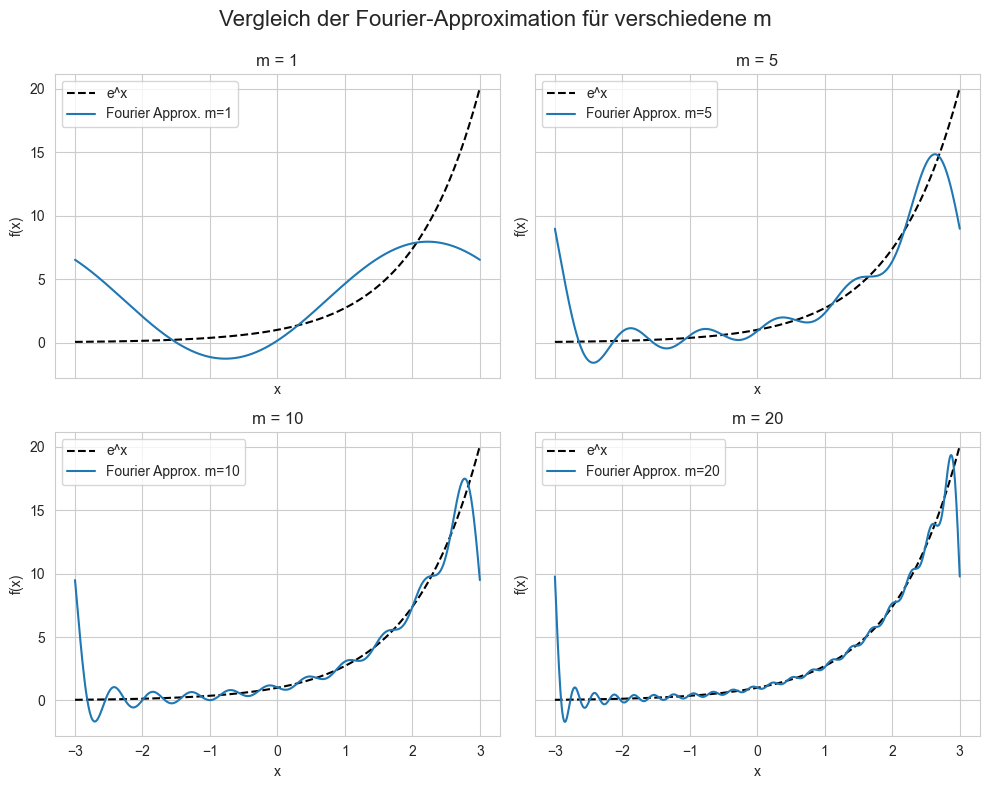

Visualisierungen für f(x) = e^|x|
Minimales m mit Fehler < 0.10%: m = 93


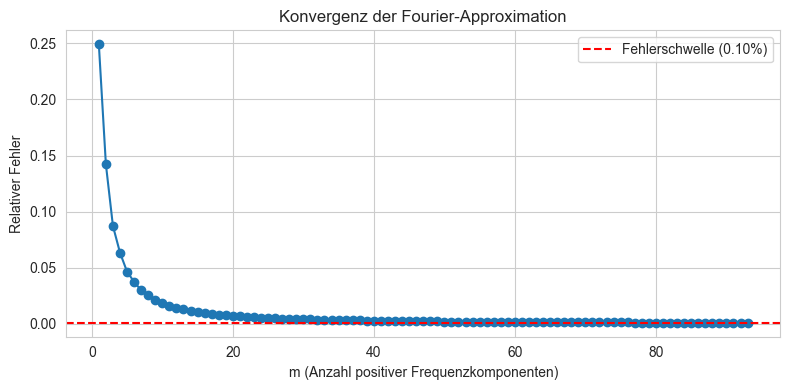

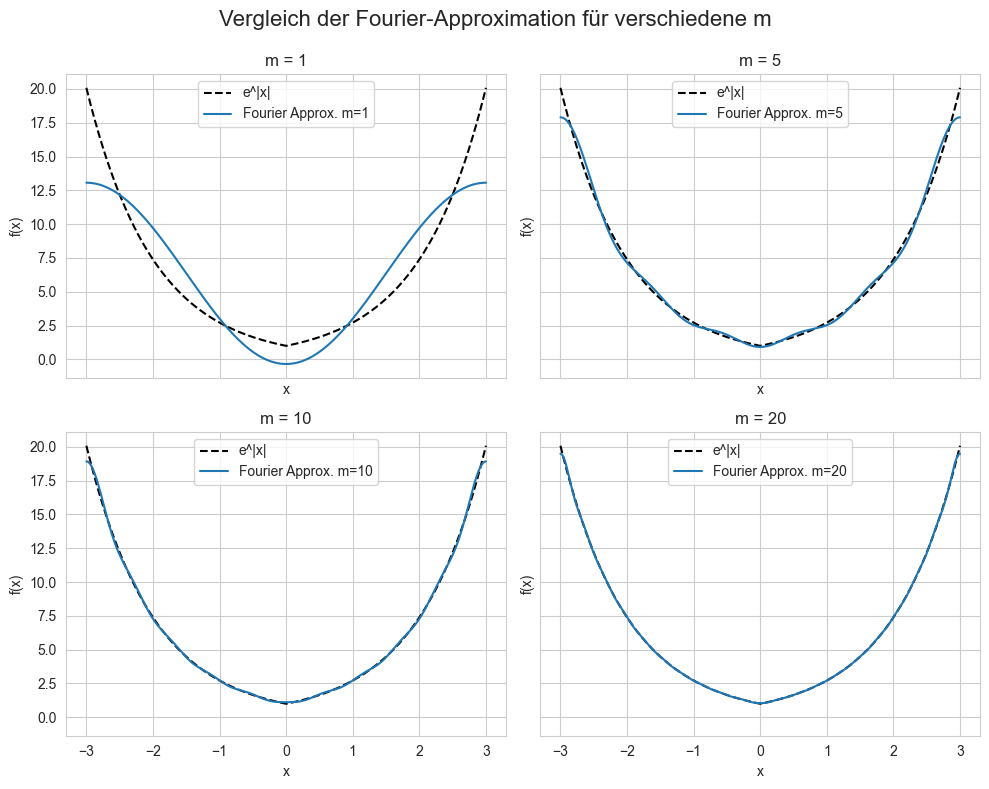

In [93]:
print("Visualisierungen für f(x) = e^x")

def f2(x):
    return np.exp(x)

_ = finde_minimales_m(f2)

plot_fourier_approximation(f2, f_label="e^x", m_values=[1, 5, 10, 20], cols=2, top=.9)


print("Visualisierungen für f(x) = e^|x|")

def f3(x):
    return np.exp(np.abs(x))

_ = finde_minimales_m(f3)

plot_fourier_approximation(f3, f_label="e^|x|", m_values=[1, 5, 10, 20], cols=2, top=.9)

# Aufgabe 2

## Einlesen und Aufbereitung der Daten

Die Datei `sunspots.txt` enthält tabulatorgetrennte Messwerte der Sonnenfleckenaktivität über viele Jahre hinweg.  
Jede Zeile enthält dabei mehrere Jahr-Wert-Paare in der Form:

jahr1 wert1 jahr2 wert2 ... jahrN wertN

Um diese Daten weiterverarbeiten zu können, werden sie zunächst mit `np.loadtxt` eingelesen.  
Anschliessend werden die **Jahre** (gerade Spalten) und **Messwerte** (ungerade Spalten) extrahiert und in flache 1D-Arrays umgewandelt:



years.shape=(315,), sunspots.shape=(315,)
Letzte 5 Einträge years: [2010. 2011. 2012. 2013. 2014.]
Letzte 5 Einträge sunspots: [16.5 55.7 57.6 64.7 79.3]


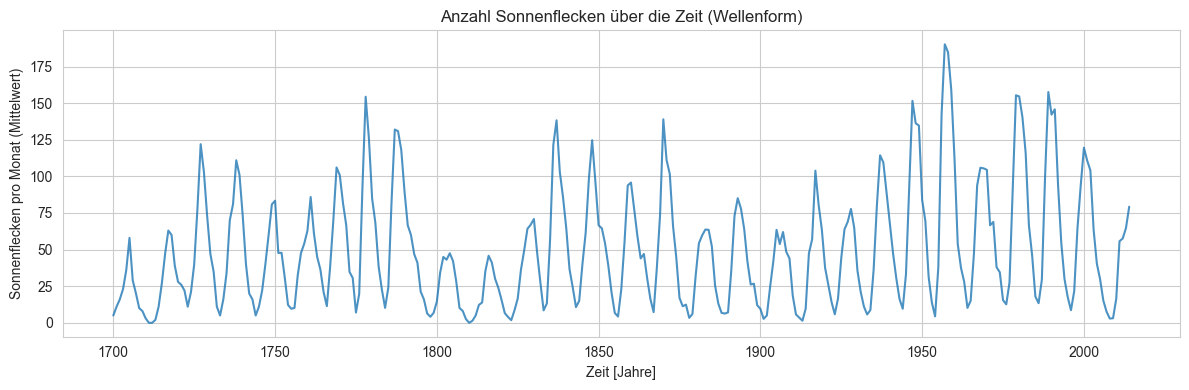

In [94]:
# Datei einlesen (tab-getrennt, mehrere Paare pro Zeile)
data = np.loadtxt("Daten/sunspots.txt", delimiter="\t")

# Jetzt sind die Daten 2D: jede Zeile hat z.B. [year1, val1, year2, val2, ..., yearN, valN]
# Wir machen daraus zwei Arrays:
years = data[:, ::2].flatten()       # Alle geraden Spalten (Jahre)
sunspots = data[:, 1::2].flatten()   # Alle ungeraden Spalten (Werte)

# Vorschau der letzten 10 Werte
print(f"{years.shape=}, {sunspots.shape=}")
print(f"Letzte 5 Einträge years: {years[-5:]}")
print(f"Letzte 5 Einträge sunspots: {sunspots[-5:]}")

plt.figure(figsize=(12, 4))
sns.lineplot(x=years, y=sunspots, alpha=0.8)
plt.title("Anzahl Sonnenflecken über die Zeit (Wellenform)")
plt.xlabel("Zeit [Jahre]")
plt.ylabel("Sonnenflecken pro Monat (Mittelwert)")
plt.grid(True)
plt.tight_layout()
plt.show()

## 2a) Frequenzanalyse der Sonnenfleckendaten mittels FFT

### Aufgabe

Plotten Sie das Power-Spektrum und finden Sie die dominante Periodizität der Schwingung. Damit erhalten Sie eine Abschätzung auf die Dauer des Sonnenzyklus.

### Ziel

Zur Identifikation periodischer Strukturen in der Sonnenfleckenaktivität wird die diskrete Fourier-Transformation (DFT) der Zeitreihe durchgeführt. Das Power-Spektrum gibt Auskunft darüber, welche Frequenzanteile in den Daten besonders stark vertreten sind.

### Vorgehen

Zunächst wird die Samplingrate aus dem Zeitabstand der Datenpunkte bestimmt. Anschliessend wird mit der Fast-Fourier-Transformation (`fft`) das Frequenzspektrum der Sonnenfleckenzahlen berechnet. Das sogenannte Power-Spektrum ergibt sich als Quadrat des Betrags der Fourier-Koeffizienten:

$$
P(f) = |\hat{f}(f)|^2
$$

Um das Spektrum korrekt zu interpretieren, werden nur die **positiven Frequenzen** ausgewertet.

### Bewertungskriterien

7) Die Wellenform und das Amplitudenspektrums werden korrekt dargestellt.

*Wellenform direkt nach dem Einlesen der Datei, Amplitudenspektrum nach dem Codeblock unten.*

8) Die dominante Periodizität der Schwingungen in Jahren wurde korrekt bestimmt.

*Siehe Ausgabe Codeblock*

Dominante Frequenz: 0.09206 (1/Jahr)
Geschätzte Periodizität des Sonnenzyklus: 10.86 Jahre


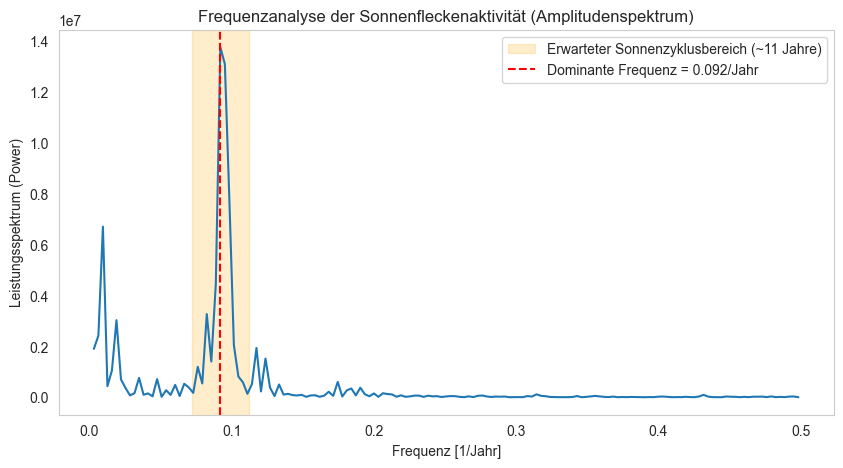

In [95]:
N = len(sunspots)
dt = years[1] - years[0]  # Zeitabstand, sollte konstant sein
freqs = fftfreq(N, dt)
fft_vals = fft(sunspots)
power = np.abs(fft_vals)**2

# Nur positive Frequenzen anzeigen
mask = freqs > 0

# Dominante Frequenz
dom_idx = np.argmax(power[mask])
dom_freq = freqs[mask][dom_idx]
dom_period = 1 / dom_freq
print(f"Dominante Frequenz: {dom_freq:.5f} (1/Jahr)")
print(f"Geschätzte Periodizität des Sonnenzyklus: {dom_period:.2f} Jahre")

delta = 0.02
plt.figure(figsize=(10, 5))
sns.lineplot(x=freqs[mask], y=power[mask])
plt.axvspan(dom_freq-delta, dom_freq+delta, color='orange', alpha=0.2, label="Erwarteter Sonnenzyklusbereich (~11 Jahre)")
plt.axvline(dom_freq, color='red', linestyle='--', label=f"Dominante Frequenz = {dom_freq:.3f}/Jahr")

plt.xlabel("Frequenz [1/Jahr]")
plt.ylabel("Leistungsspektrum (Power)")
plt.title("Frequenzanalyse der Sonnenfleckenaktivität (Amplitudenspektrum)")
plt.legend(loc="best")
plt.grid()

## 2b) Weitere Perioden im Fourier-Spektrum

### Aufgabe

Können Sie weitere Perioden in den Sonnenfleckendaten mithilfe des Fourier-Spektrums finden?

### Ziel

Neben der dominanten Frequenzkomponente im Bereich von ca. 11 Jahren sollen zusätzliche periodische Strukturen in der Sonnenfleckenaktivität identifiziert werden. Dies erfolgt durch eine Analyse signifikanter Peaks im Leistungsspektrum.

### Vorgehen

Mithilfe der Funktion `scipy.signal.find_peaks` werden lokale Maxima im Power-Spektrum bestimmt, deren Höhe über einer definierten Schwelle liegt. Solche Peaks weisen auf besonders ausgeprägte Frequenzanteile hin und ermöglichen Rückschlüsse auf charakteristische Perioden in der Zeitreihe.

### Ergebnisse

Folgende signifikante Perioden wurden im Power-Spektrum identifiziert (aufsteigend sortiert):

- ~8.08 Jahre  
- ~8.51 Jahre  
- ~10.86 Jahre  
- ~12.12 Jahre  
- ~13.12 Jahre  
- ~52.50 Jahre  
- ~105.00 Jahre  

Die bekannteste davon ist der Sonnenzyklus mit rund 11 Jahren, der hier durch mehrere benachbarte Peaks bestätigt wird. Darüber hinaus deuten die Perioden bei ~52 und ~105 Jahren auf langfristige Schwankungen hin – möglicherweise im Zusammenhang mit bekannten mehrdekadischen Phänomenen wie dem **Gleissberg-Zyklus**.

### Interpretation

Die Analyse zeigt, dass die Sonnenfleckenaktivität nicht nur durch einen einzelnen dominanten Zyklus geprägt ist, sondern sich aus einer Überlagerung mehrerer periodischer Komponenten zusammensetzt – darunter sowohl kurz- als auch langfristige Zyklen.  

Die Fourier-Transformation erweist sich damit als effektives Werkzeug, um verborgene Frequenzstrukturen in komplexen Zeitreihen wie diesen zu erkennen und zu quantifizieren.

### Bewertungskriterien
9) Weitere Perioden im Fourier-Spektrum wurden korrekt in Jahren identifiziert.

*Siehe Abschnitt Ergebnisse.*

Weitere signifikante Perioden:
  ~8.08 Jahre
  ~8.51 Jahre
  ~10.86 Jahre
  ~12.12 Jahre
  ~13.12 Jahre
  ~52.50 Jahre
  ~105.00 Jahre


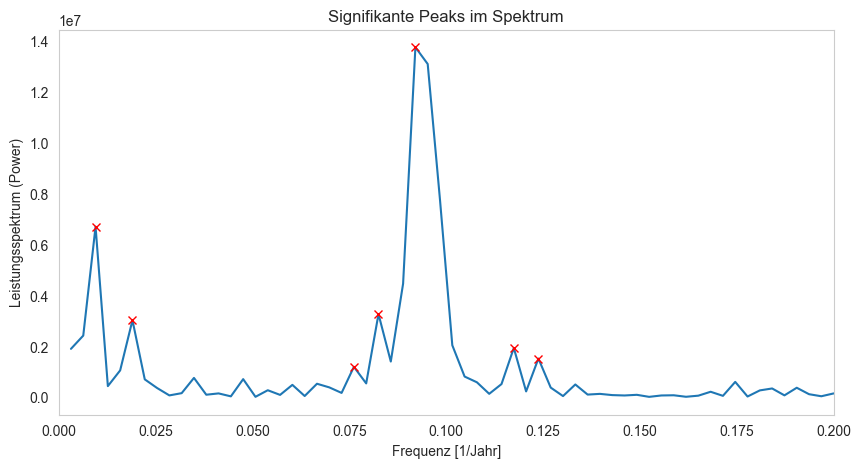

In [96]:
peaks, _ = find_peaks(power[mask], height=1e6)  # Schwelle anpassen je nach Skala
peak_freqs = freqs[mask][peaks]
peak_periods = 1 / peak_freqs

print("Weitere signifikante Perioden:")
for p in sorted(peak_periods, reverse=False):
    print(f"  ~{p:.2f} Jahre")

# Optional plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=freqs[mask], y=power[mask])
plt.plot(peak_freqs, power[mask][peaks], "rx")
plt.xlim(0, 0.2)
plt.title("Signifikante Peaks im Spektrum")
plt.xlabel("Frequenz [1/Jahr]")
plt.ylabel("Leistungsspektrum (Power)")

plt.grid()
plt.show()

## 2c) Manipulation des Fourier-Spektrums: Rücktransformation nach Frequenzfilterung

### Aufgabe

Entfernen Sie ausgewählte Komponenten im Fourier-Spektrum und rekonstruieren Sie anschliessend das Zeitraumsignal. Analysieren Sie, welche Auswirkungen das gezielte Beibehalten bzw. Entfernen von niedrigen oder hohen Frequenzen auf das rekonstruierte Signal hat.

### Ziel

Die Fourier-Koeffizienten enthalten Informationen über die Frequenzanteile des Signals. Durch das gezielte Nullsetzen bestimmter Bereiche des Spektrums kann man das Verhalten des Signals im Zeitbereich gezielt verändern:

- **Nur tieffrequente Anteile (k ≤ 20):** Glättung, langfristige Struktur
- **Nur hochfrequente Anteile (k ≥ 5):** Details, schnelle Schwankungen

---

### Vorgehen

Zunächst wird die FFT des Originalsignals berechnet. Anschliessend werden zwei Varianten erstellt:

- **Tiefpassfilterung:** Alle Frequenzanteile mit Index $k > 20$ (und ihre Spiegelanteile) werden entfernt.
- **Hochpassfilterung:** Die kleinsten Frequenzanteile (k < 5) werden auf null gesetzt, um langsame Schwankungen zu eliminieren.

### Ergebnisse & Interpretation

Die beiden folgenden Abbildungen zeigen die Auswirkungen gezielter Frequenzfilterung auf die Sonnenfleckendaten:

- **Tiefpassfilterung (k ≤ 20):**  
  Durch das Entfernen höherer Frequenzanteile wird das Signal deutlich geglättet. Die schnellen, zyklischen Schwankungen verschwinden, während der **langfristige Verlauf der Sonnenaktivität** erhalten bleibt.  
  In der resultierenden Kurve erkennt man deutlich den **allgemeinen Trendverlauf**, inklusive mehrdekadischer Maxima und Minima. Diese Art der Filterung ist besonders nützlich zur Analyse **langfristiger klimatischer oder astrophysikalischer Zyklen**.

- **Hochpassfilterung (k ≥ 5):**  
  Hier werden die niedrigfrequenten Komponenten – also **langsame Trendanteile** – entfernt. Das resultierende Signal enthält überwiegend **kurzfristige, hochfrequente Schwankungen**.  
  Diese Darstellung hebt feine Modulationen und unregelmässige Abweichungen vom idealen Zyklus hervor, die z.B. auf **kurzfristige Ereignisse oder Störungen im Sonnenverhalten** hinweisen könnten. Der charakteristische 11-Jahres-Zyklus ist hingegen kaum mehr erkennbar.

**Fazit:**  
Die Modifikation des Frequenzspektrums durch gezieltes Entfernen bestimmter Komponenten ermöglicht eine **selektive Betrachtung von Struktur und Detail** innerhalb der Zeitreihe.  
Während Tiefpassfilterung hilft, globale Muster zu erkennen, erlaubt die Hochpassfilterung die Analyse schneller Schwankungen. Beide Sichtweisen ergänzen sich in der umfassenden Interpretation der Sonnenfleckenaktivität.

### Bewertungskriterien

10) Komponenten wurden korrekt entfernt und eine Rücktransformation durchgeführt.

*Siehe Ausgabe Codeblock.*

11) Die Ergebnisse nach dem Entfernen der Komponenten wurden korrekt und verständlich beschrieben und erklärt.

*Siehe gesamtes Unterkapitel 2c)*

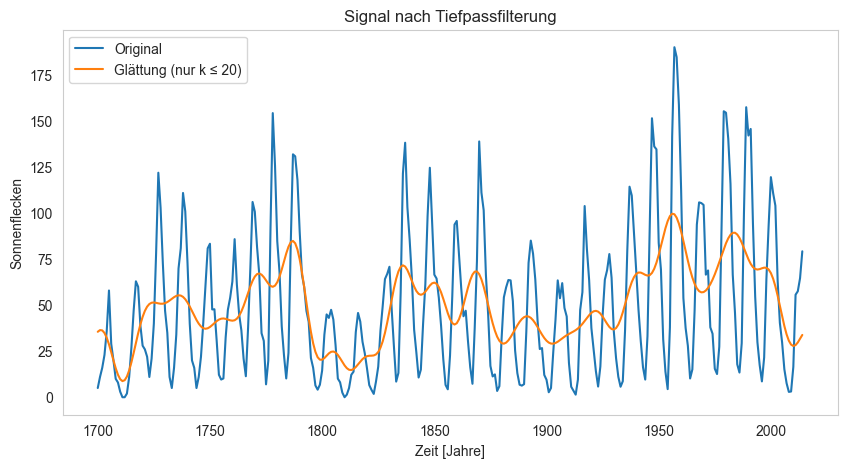

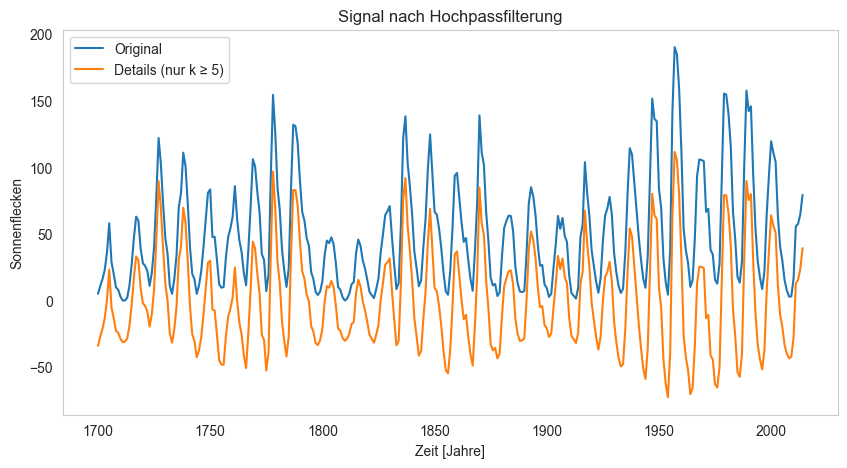

In [97]:

# Tiefpassfilterung: Nur k ≤ 20
fft_cut_high = fft_vals.copy()
fft_cut_high[21:-21] = 0  # Hohe Frequenzen entfernen
sunspots_smooth = np.real(np.fft.ifft(fft_cut_high))

plt.figure(figsize=(10, 5))
sns.lineplot(x=years, y=sunspots, label="Original")
plt.plot(years, sunspots_smooth, label="Glättung (nur k ≤ 20)")
plt.legend()
plt.title("Signal nach Tiefpassfilterung")
plt.xlabel("Zeit [Jahre]")
plt.ylabel("Sonnenflecken")
plt.grid()
plt.show()

# Hochpassfilterung: Nur k ≥ 5
fft_cut_low = fft_vals.copy()
fft_cut_low[:5] = 0
fft_cut_low[-4:] = 0  # Symmetrische Spiegelanteile
sunspots_detail = np.real(np.fft.ifft(fft_cut_low))

plt.figure(figsize=(10, 5))
sns.lineplot(x=years, y=sunspots, label="Original")
plt.plot(years, sunspots_detail, label="Details (nur k ≥ 5)")
plt.legend()
plt.title("Signal nach Hochpassfilterung")
plt.xlabel("Zeit [Jahre]")
plt.ylabel("Sonnenflecken")
plt.grid()
plt.show()

## 2d) Vergleich mit Aufgabe 1: Synthetische vs. reale Daten

### Vergleich der Fourier-Analyse in Aufgabe 1 (synthetisch) und Aufgabe 2 (reale Sonnenfleckendaten)

| Vergleichspunkt         | Aufgabe 1 (synthetisch)                       | Aufgabe 2 (reale Daten)                        |
|-------------------------|----------------------------------------------|------------------------------------------------|
| **Signalart**           | Glatt, exakt periodisch, analytisch gegeben  | Reale Messdaten, verrauscht, quasiperiodisch   |
| **Fourier-Koeffizienten** | Exakt berechenbar, symmetrisch, komplex     | FFT-basiert, unsymmetrisch, spektral breiter   |
| **Konvergenzverhalten** | Sehr schnell, besonders bei glatten Funktionen | Langsamer, durch Rauschen und Diskontinuitäten |
| **Ziel & Anwendung**    | Theoretische Approximation und Visualisierung | Analyse, Filterung, Periodendetektion          |

---

### Fazit

- Die Fourier-Analyse bei analytischen Funktionen (Aufgabe 1) liefert klare, symmetrische Koeffizienten mit schnellem Konvergenzverhalten.
- Bei realen Zeitreihen (Aufgabe 2) ist das Spektrum komplexer: Es enthält **Rauschen**, **mehrere Perioden** und oft **asymmetrische Verteilungen**.
- Die **Fast Fourier Transform (FFT)** ist dennoch ein mächtiges Werkzeug zur Frequenzanalyse, insbesondere zur **Erkennung dominanter Zyklen**, wie etwa des ca. **11-jährigen Sonnenfleckenzyklus**.
- Die **gezielte Filterung** (Hoch-/Tiefpass) verdeutlicht, wie bestimmte Frequenzbereiche das Signal formen:  
  Tieffrequente Anteile repräsentieren **langsame Trends**, hochfrequente dagegen **Details oder Störungen**.

Die Fourier-Analyse ermöglicht somit nicht nur die mathematische Zerlegung, sondern auch die **gezielte Interpretation und Bearbeitung realer Signale** – ein zentrales Werkzeug in der Datenanalyse.

### Bewertungskriterien
12) Vergleich der Ergebnisse mit denen aus der Fourier-Approximation wurde korrekt und verständlich dargestellt und erklärt.

*Siehe gesamtes Unterkapitel 2d)*

# Aufgabe 3

## Einlesen und Aufbereitung der Daten



In [98]:
# Laden der Musikdatei
audio_data, sample_rate = librosa.load("Daten/music.wav")

# Metadaten: Shape, Länge [s], Sample Rate [Hz]
print(f"Shape: {audio_data.shape}")
duration = len(audio_data) / sample_rate
print(f"Länge: {duration:.2f} Sekunden")
print(f"Sample rate: {sample_rate} Hz")

# Kanäle überprüfen, theoretisch nicht nötig,
# da librosa.load per Default in Mono umwandelt
if audio_data.ndim > 1:
    print("Audio ist Stereo, konvertiere zu Mono.")
    audio_data = audio_data.mean(axis=1)  # Konvertiere zu Mono
else:
    print("Audio bereits Mono.")

# Audio abspielen
print("Vollständiges Sample zum Abspielen.")
Audio(audio_data, rate=sample_rate)

Shape: (78587,)
Länge: 3.56 Sekunden
Sample rate: 22050 Hz
Audio bereits Mono.
Vollständiges Sample zum Abspielen.


## 3a) Analyse eines Audiosignals (music.wav)

### Aufgabe

Plotten Sie die Wellenform des Klangs (waveplot) - einmal vollständig und einmal für einen kleinen Zeitberech, sodass die Wellenform deutlich wird - sowie das Amplitudenspektrum.  
Wieso ist das Amplitudenspektrum symmetrisch bezüglich des Vorzeichens?

### Ziel

Das Ziel dieser Aufgabe ist es, ein gegebenes Audiosignal visuell und spektral zu analysieren. Dafür werden:

- die **Wellenform** über die gesamte Dauer sowie in mehreren **zeitlichen Zoomstufen** dargestellt,
- und das **Amplitudenspektrum** mittels Fourier-Transformation berechnet und visualisiert.

### Vorgehen

Zunächst wird das Audiosignal mithilfe von `librosa.load` oder `soundfile.read` eingelesen und als Zeitreihe verarbeitet.  
Dann wird die diskrete Fourier-Transformation (`np.fft.fft`) verwendet, um das Spektrum zu berechnen. Es werden nur die **positiven Frequenzen** dargestellt, da das Spektrum für reelle Signale **symmetrisch** ist.

### Visualisierung

1. **Amplitudenspektrum:**  
   Das Spektrum zeigt eine starke Konzentration niedriger Frequenzen (unter 1000 Hz), aber auch ausgeprägte Spitzen im Bereich zwischen 4000–10000 Hz. Diese könnten auf Obertöne, Transienten oder Instrumentencharakteristika hinweisen.

2. **Wellenform des gesamten Signals:**  
   Zeigt den zeitlichen Verlauf der Amplitude über die gesamte Signalzeit (~3.5 s). Die regelmässige Struktur lässt auf eine rhythmische Komponente schliessen.

3. **Zoom auf erste 0.1 Sekunden:**  
   Hier wird ein einzelner Klangimpuls sichtbar, vermutlich ein einzelner Anschlag oder Tonbeginn.

4. **Zoom auf erste 0.02 Sekunden:**  
   Die Feinstruktur des Einschwingvorgangs wird deutlich, inklusive Wellenpakete und hochfrequenter Anteile.

---

### Warum ist das Spektrum symmetrisch?

Das Spektrum eines **reellen Zeitsignals** (wie ein Audiosignal) ist immer **hermitesch symmetrisch**, d.h.:

$$
\hat{f}(-f) = \overline{\hat{f}(f)}
$$

Die Amplituden (Beträge) sind deshalb **spiegelsymmetrisch** zur Nullfrequenz.  
In der Praxis zeigt man meist nur die **positive Hälfte** des Spektrums, da sie alle Informationen enthält.

### Fazit

Die Darstellung zeigt, dass das Audiosignal aus rhythmisch wiederkehrenden Impulsen mit komplexer Einschwingstruktur besteht. Die spektrale Analyse offenbart ein breites Frequenzspektrum, das sowohl Grundfrequenzen als auch Obertöne abbildet – typisch für reale Musiksignale.

### Bewertungskriterien

13) Die Wellenform und das Amplitudenspektrums werden korrekt dargestellt.

*Siehe Plot Output unten.*

14) Symmetrie des Amplitudenspektrums wurde korrekt und verständlich erklärt.

*Siehe Unterkapitel "Warum ist das Spektrum symmetrisch?*



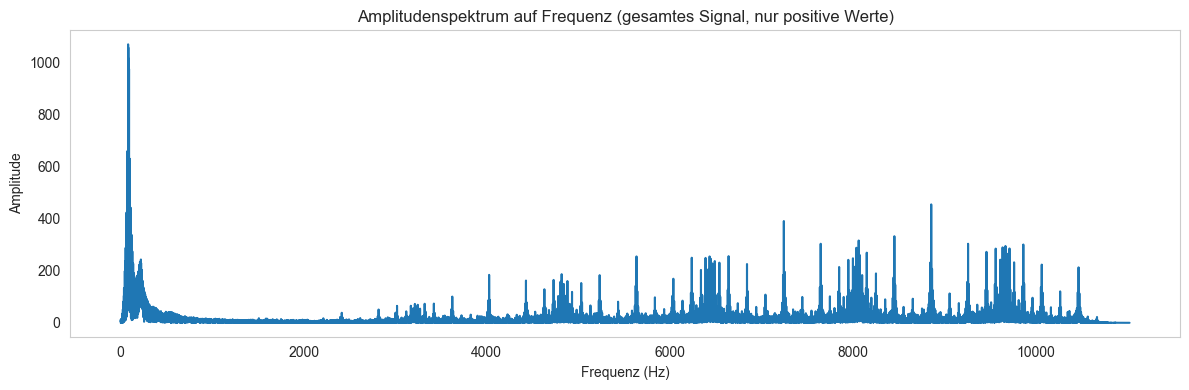

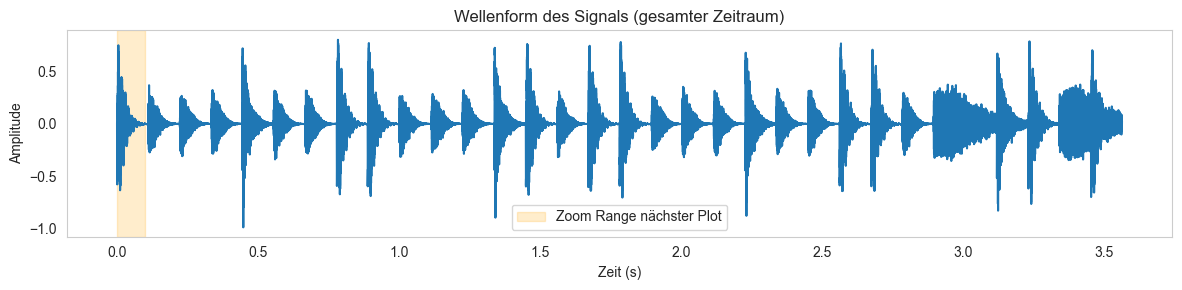

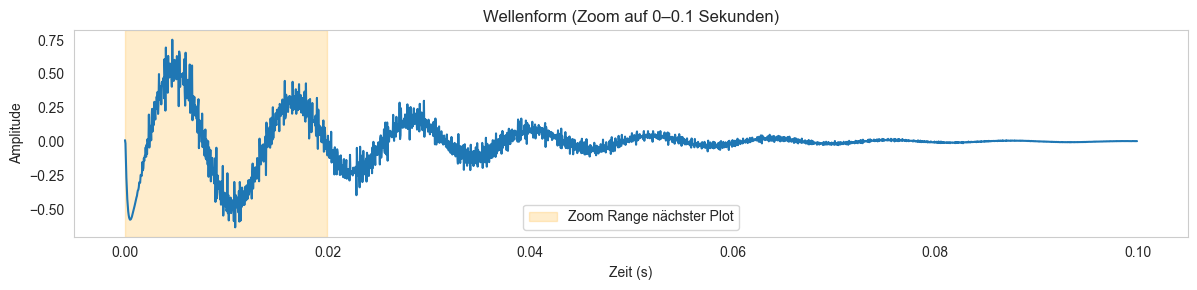

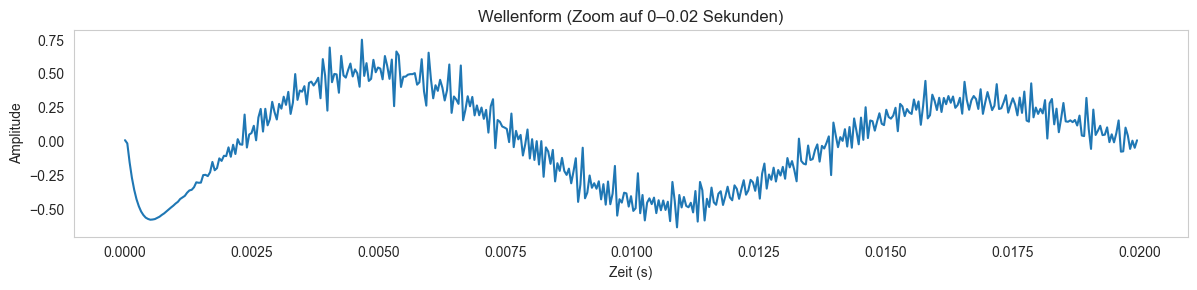

In [99]:
N = len(audio_data)
freqs = fftfreq(N, d=1/sample_rate)
fft_vals = fft(audio_data)
amplitude = np.abs(fft_vals)

mask = freqs >= 0  # nur positive Frequenzen

plt.figure(figsize=(12, 4))
plt.plot(freqs[mask], amplitude[mask])
plt.title("Amplitudenspektrum auf Frequenz (gesamtes Signal, nur positive Werte)")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

time = np.linspace(0, len(audio_data) / sample_rate, len(audio_data))

plt.figure(figsize=(12, 3))
plt.plot(time, audio_data)
plt.axvspan(0, 0.1, color='orange', alpha=0.2, label="Zoom Range nächster Plot")
plt.title("Wellenform des Signals (gesamter Zeitraum)")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()

# Zoom auf erste 0.1s
zoom_range = int(sample_rate * 0.1)
plt.figure(figsize=(12, 3))
plt.plot(time[:zoom_range], audio_data[:zoom_range])
plt.axvspan(0, 0.02, color='orange', alpha=0.2, label="Zoom Range nächster Plot")
plt.title("Wellenform (Zoom auf 0–0.1 Sekunden)")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.legend(loc="lower center")
plt.grid()
plt.tight_layout()
plt.show()

# Zoom auf erste 0.02s
zoom_range = int(sample_rate * 0.02)
plt.figure(figsize=(12, 3))
plt.plot(time[:zoom_range], audio_data[:zoom_range])
plt.title("Wellenform (Zoom auf 0–0.02 Sekunden)")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

## 3b) Frequenzbereichstrennung und Analyse

### Aufgabe

Trennen Sie den Sound-Signal in einen Teil oberhalb und unterhalb von 2 kHz in Frequenzen.  
Identifizieren Sie jeweils die Top 5 Frequenzen in diesen Frequenzbereichen.

### Ziel

Das Ziel dieser Aufgabe ist es, das Audiosignal im Frequenzbereich zu analysieren. Konkret sollen:

- Frequenzen unterhalb und oberhalb von **2000 Hz** getrennt betrachtet werden,
- und jeweils die **Top 5 dominanten Frequenzen** identifiziert werden.

### Vorgehen

Das Amplitudenspektrum des Signals wurde bereits in Aufgabe 3a berechnet.  
Anhand einer definierten Grenzfrequenz (2000 Hz) wird das Spektrum nun in zwei Bereiche unterteilt:

- **Tieffrequenter Bereich:** 0 – 2000 Hz  
- **Hochfrequenter Bereich:** ≥ 2000 Hz

Für beide Bereiche werden die Amplitudenwerte sortiert und die jeweils 5 stärksten Frequenzkomponenten extrahiert.

### Fazit 



### Bewertungskriterien

15) Erfolgreiche Trennung des Klangsignals in Frequenzbereiche und korrekte Identifizierung der Top 5 Frequenzen in Hertz.

*Hoch-/Tiefpass siehe Codeblock, Top 5 Frequenzen via Textoutput unter Codeblock und (wenn auch nicht optimal sichtbar) im Plot markiert.*

Top 5 Frequenzen < 2 kHz:
  80.81 Hz – Amplitude: 1070.67
  81.93 Hz – Amplitude: 1058.74
  89.79 Hz – Amplitude: 1015.16
  90.91 Hz – Amplitude: 975.85
  71.83 Hz – Amplitude: 659.94

Top 5 Frequenzen ≥ 2 kHz:
  8857.37 Hz – Amplitude: 455.23
  7246.84 Hz – Amplitude: 391.25
  8454.74 Hz – Amplitude: 332.89
  8064.73 Hz – Amplitude: 316.38
  9260.01 Hz – Amplitude: 303.88


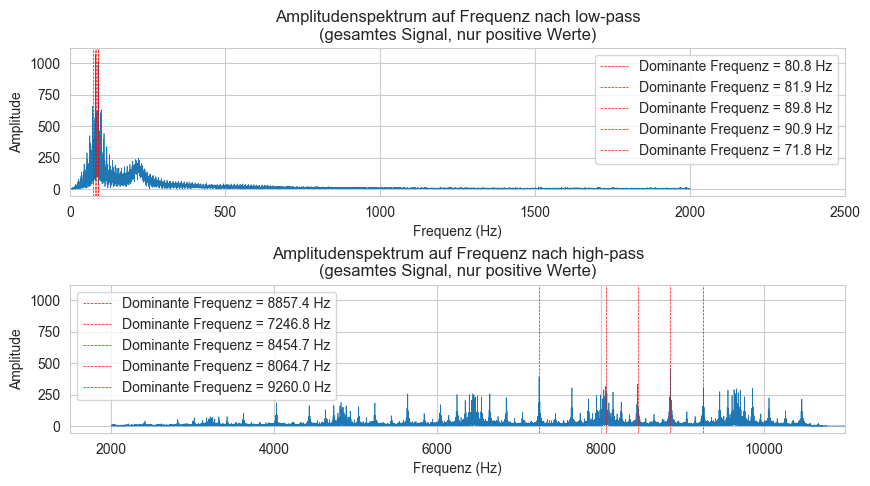

In [100]:
# --- Fourier-Analyse vorbereiten ---
N = len(audio_data)
freqs = fftfreq(N, d=1/sample_rate)
fft_vals = fft(audio_data)
amplitude = np.abs(fft_vals)

# --- Frequenzbereich trennen ---
cutoff = 2000  # Grenzfrequenz in Hz

low_mask = (freqs >= 0) & (freqs < cutoff)
high_mask = (freqs >= cutoff)

# --- Top 5 Frequenzen unterhalb von 2 kHz ---
top_low_indices = np.argsort(amplitude[low_mask])[-5:][::-1]
top_low_freqs = freqs[low_mask][top_low_indices]
top_low_amps = amplitude[low_mask][top_low_indices]

# --- Top 5 Frequenzen oberhalb von 2 kHz ---
top_high_indices = np.argsort(amplitude[high_mask])[-5:][::-1]
top_high_freqs = freqs[high_mask][top_high_indices]
top_high_amps = amplitude[high_mask][top_high_indices]

# --- Ausgabe ---
print("Top 5 Frequenzen < 2 kHz:")
for f, a in zip(top_low_freqs, top_low_amps):
    print(f"  {f:.2f} Hz – Amplitude: {a:.2f}")

print("\nTop 5 Frequenzen ≥ 2 kHz:")
for f, a in zip(top_high_freqs, top_high_amps):
    print(f"  {f:.2f} Hz – Amplitude: {a:.2f}")
    
    
N = len(audio_data)
freqs = fftfreq(N, d=1/sample_rate)
fft_vals = fft(audio_data)
amplitude = np.abs(fft_vals)

fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=False, sharey=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.6)

axes = axes.flatten()  # Zum einfachen Zugriff auf alle Subplots
        
axes[0].plot(freqs[low_mask], amplitude[low_mask], linewidth=.5)
axes[0].set_title("Amplitudenspektrum auf Frequenz nach low-pass\n(gesamtes Signal, nur positive Werte)")
axes[0].set_xlabel("Frequenz (Hz)")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlim((0,2500))
for freq in top_low_freqs:
    axes[0].axvline(freq, linewidth=.5, color='red', linestyle='--', label=f"Dominante Frequenz = {freq:.1f} Hz")
axes[0].grid(True)        
axes[0].legend()

axes[1].plot(freqs[high_mask], amplitude[high_mask], linewidth=.5)
axes[1].set_title("Amplitudenspektrum auf Frequenz nach high-pass\n(gesamtes Signal, nur positive Werte)")
axes[1].set_xlabel("Frequenz (Hz)")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlim((1500,11000))
for freq in top_high_freqs:
    axes[1].axvline(freq, linewidth=.5, color='red', linestyle='--', label=f"Dominante Frequenz = {freq:.1f} Hz")
axes[1].grid(True)
axes[1].legend()
plt.show()

## 3c) Rekonstruktion & Fehleranalyse der Frequenzbereiche

### Aufgabe

Berechnen Sie aus diesen beiden Teilen jeweils eine Rekonstruktion. Berechnen Sie den Fehler der Rekonstruktion wie in Aufgabe 1 für die gefilterten Signale und schreiben Sie die gefilterten rekonstruierten Daten in eine wav-Datei.   Beschreiben und erklären Sie das Ergebnis.

### Ziel

Die beiden zuvor separierten Frequenzbereiche (unterhalb und oberhalb von 2kHz) sollen einzeln **rekonstruiert** und mit dem Originalsignal verglichen werden. Ziel ist es, den Beitrag der jeweiligen Frequenzen zum Gesamtsignal zu analysieren.

### Vorgehen

1. Die im Frequenzbereich gefilterten Spektren (`fft_low`, `fft_high`) werden rücktransformiert mittels `ifft`.
2. Der **relative Fehler** gegenüber dem Originalsignal wird gemäss Aufgabe 1 berechnet.
3. Die rekonstruierten Signale werden als `.wav`-Dateien gespeichert.

### Ergebnisse der rekonstruierten Signale

Die getrennt rekonstruierten Signale enthalten jeweils nur einen Teil des Frequenzspektrums des Originals:

- Das Signal mit **Frequenzen unterhalb von 2kHz** weist einen **relativen Fehler von ca. 57.8%** auf. Es enthält die grundlegende Struktur und den Grossteil der Energie des Originalsignals, klingt jedoch dumpfer und weniger detailreich.
- Das Signal mit **Frequenzen oberhalb von 2kHz** hat einen **höheren Fehler von ca. 43.6%** und wirkt deutlich dünner oder „zitternd“. Es enthält vor allem Obertöne und hochfrequente Details.

Die Ergebnisse zeigen, dass **tieffrequente Anteile** für die Wahrnehmung von Rhythmus und Grundklang dominieren, während **hochfrequente Komponenten** vor allem zur Klangfarbe und Brillanz beitragen.

Beide rekonstruierten Signale wurden als WAV-Dateien gespeichert und können separat angehört werden, um die Wirkung der Frequenztrennung auch auditiv zu erfassen.

### Bewertungskriterien

16) Gefilterte Signale wurden korrekt rekonstruiert.

*Funktionsweise sichtbar via Code. Rekonstruierte Dateien sind zudem in /Daten/output/ aufrufbar.*

17) Fehler der gefilterten rekonstruierten Signale wurde korrekt berechnet.

*Fehler in Prozent als Ausgabe nach Codeblock.*

18) Die Ergebnisse wurden korrekt und verständlich beschrieben und erklärt.

*Da "die Ergebnisse" nicht exakt definiert ist: In jeder Unteraufgabe Diskussion der Ergebnisse.*

In [101]:
# --- Frequenzbereichs-Filterung vorbereiten ---
fft_low = np.zeros_like(fft_vals)
fft_high = np.zeros_like(fft_vals)

# Positive Frequenzen kopieren
fft_low[low_mask] = fft_vals[low_mask]
fft_high[high_mask] = fft_vals[high_mask]

# Negative Frequenzen spiegeln (für reale Signale notwendig)
fft_low[-np.sum(low_mask):] = fft_vals[-np.sum(low_mask):]
fft_high[-np.sum(high_mask):] = fft_vals[-np.sum(high_mask):]

# --- Rücktransformation ---
reconstructed_low = np.real(ifft(fft_low))
reconstructed_high = np.real(ifft(fft_high))

# --- Fehlerberechnung ---
def relative_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed) / np.linalg.norm(original)

error_low = relative_error(audio_data, reconstructed_low)
error_high = relative_error(audio_data, reconstructed_high)
print(f"Relativer Fehler (<2kHz): {error_low:.4%}")
print(f"Relativer Fehler (≥2kHz): {error_high:.4%}")

# --- WAV-Dateien speichern ---
try:
    sf.write("Daten/output/output_low.wav", reconstructed_low, sample_rate)
    sf.write("Daten/output/output_high.wav", reconstructed_high, sample_rate)
    print("Dateien wurden in 'Daten/output' gespeichert.")
except:
    print("Fehler beim Speichern der Dateien.")

Relativer Fehler (<2kHz): 57.8325%
Relativer Fehler (≥2kHz): 43.6123%
Dateien wurden in 'Daten/output' gespeichert.


In [102]:

# Audio abspielen
print("Rekonstruierte tiefe Frequenzen zum Abspielen.")
Audio(reconstructed_low, rate=sample_rate)

Rekonstruierte tiefe Frequenzen zum Abspielen.


In [103]:
print("Rekonstruierte hohe Frequenzen zum Abspielen.")
Audio(reconstructed_high, rate=sample_rate)

Rekonstruierte hohe Frequenzen zum Abspielen.


# Aufgabe 4

## Einlesen und Aufbereitung der Daten



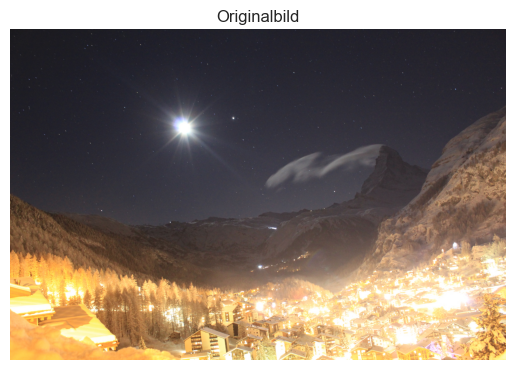

Originalbild ist RGB.
Umwandlung in Graustufen.


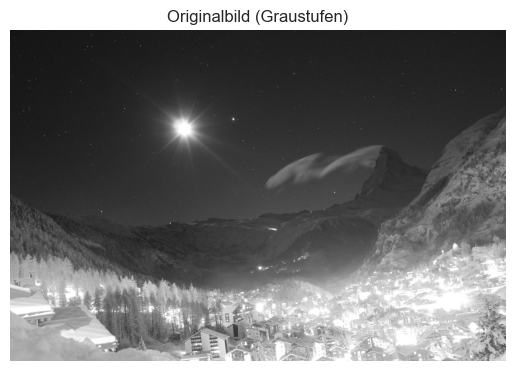

In [104]:
# Bild laden
img_original = mpimg.imread("Daten/img.jpg")

# Anzeigen des Originalbilds
plt.imshow(img_original)
plt.axis('off')
plt.title("Originalbild")
plt.show()

# Falls es ein Farb-Bild ist (RGB):
# in Graustufenbild umwandeln und anzeigen
if img_original.ndim == 3:
    print("Originalbild ist RGB.\nUmwandlung in Graustufen.")
    img = img_original.mean(axis=2)
    plt.imshow(img, cmap='gray')
    plt.title("Originalbild (Graustufen)")
    plt.axis("off")
    plt.show()
else:
    print("Bild Bereits in Graustufen")
    img = img_original
    
# Normierung: Ganzzahlige Bilddaten (z.B. uint8) in Gleitkommazahlen im Bereich [0, 1] umwandeln
if img.dtype != np.float32 and img.dtype != np.float64:
    img = img.astype(np.float32) / 255.0

## 4a) 2D-Fourier-Spektrum eines Bildes

### Aufgabe

Plotten Sie die 2D-Verteilung der absoluten Werte der Fourier-Komponenten, sodass die kleinsten k-Werte in der Mitte liegen. Erklären Sie die Natur der Verteilung.

### Ziel

Ziel dieser Aufgabe ist es, das **Amplitudenspektrum** eines Bildes zu berechnen und darzustellen.  
Dabei sollen die kleinsten Frequenzanteile (DC-Komponente und Umgebung) **zentral im Bild** erscheinen, sodass die Raum-Frequenz-Struktur klar erkennbar wird.

### Vorgehen

1. Es wird die 2D-Fourier-Transformation (`fft2`) auf das Bild angewendet.
2. Mittels `fftshift` wird die Nullfrequenz (DC-Anteil) in die Bildmitte verschoben.
3. Das Betragsbild wird logarithmisch (`log1p`) skaliert, um sowohl hohe als auch niedrige Frequenzanteile sichtbar zu machen.
4. Die Darstellung erfolgt in Graustufen ohne Achsenbeschriftung.

### Analyse der 2D-Fourier-Verteilung

Das gezeigte Log-Amplitudenbild stellt die **Frequenzverteilung** des Bildinhalts im **Frequenzraum** dar.  
Durch die Anwendung von `fftshift` befinden sich die **niedrigsten Frequenzen (kleine $k$-Werte)** im **Zentrum des Bildes**, während höhere Frequenzen radial nach aussen verlaufen.

#### Natur der Verteilung:

- **Zentrum (helle Region):**  
  Die zentrale, helle Region enthält die **tieffrequenten Anteile** des Bildes. Diese entsprechen **groben Strukturen und langsamen Helligkeitsänderungen**, z.B. Flächen oder Schattenverläufe.  
  Ihre hohe Energie zeigt sich in starken Amplitudenwerten → daher erscheinen sie hell im logarithmischen Spektrum.

- **Ränder (dunkle Aussenbereiche):**  
  Die äusseren Bereiche enthalten **hochfrequente Anteile**, die feine Details, Kanten, Texturen oder Rauschen darstellen. Ihre Energie ist geringer → sie erscheinen dunkel.

- **Strahlenartige Muster (falls sichtbar):**  
  Diese entstehen typischerweise durch **gerichtete Strukturen im Bild**, z.B. Linien, Text oder Raster.  
  Die Orientierung der Frequenzanteile im Spektrum ist orthogonal zur Richtung im Bildraum.

- **Symmetrie der Verteilung:**  
  Da das Bild reellwertig ist, ist das Spektrum **hermitesch symmetrisch**, d.h. gegenüber dem Bildzentrum spiegelbildlich (komplex-konjugiert). Die Amplituden erscheinen deshalb **punktsymmetrisch**.

#### Fazit:

Die Fourier-Analyse zeigt, wie sich ein Bild in seine Frequenzanteile zerlegen lässt:  
- **Tiefe Frequenzen** kodieren den globalen Bildinhalt,  
- **hohe Frequenzen** enthalten feine Details.  
Die Visualisierung in logarithmischer Skala ermöglicht es, **sowohl starke als auch schwache Frequenzanteile** gleichzeitig zu erkennen.

Diese Darstellung ist die Grundlage für viele Anwendungen wie Filterung, Kompression, Kantenerkennung oder Bildrekonstruktion.

### Bewertungskriterien

19) Darstellung der 2D-Verteilung der absoluten Werte der Fourier-Komponenten ist korrekt.

*Siehe graphischer Output nach Codeblock.*

20) Verteilung der Fourier-Komponenten wurde korrekt und verständlich erklärt.

*Siehe Unterkapitel "Analyse der 2D-Fourier-Verteilung"*


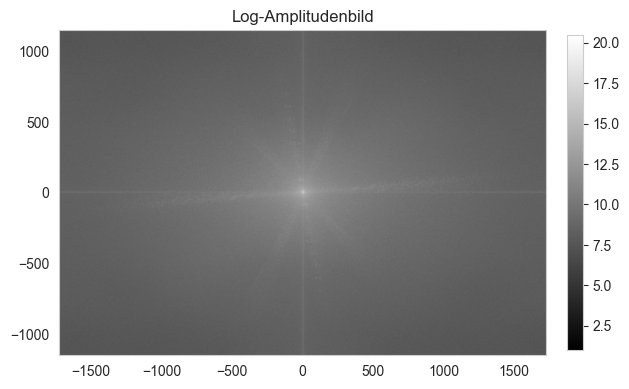

In [105]:
def plot_fft_amplitude(image):
    F = fftshift(fft2(image))
    magnitude = np.abs(F)
    extent = (-image.shape[1] // 2, image.shape[1] // 2,
              -image.shape[0] // 2, image.shape[0] // 2)

    plt.imshow(np.log1p(magnitude), cmap='gray', extent=extent)
    plt.title("Log-Amplitudenbild")
    plt.colorbar(fraction=0.03, pad=0.04)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_fft_amplitude(img)

## 4b) Frequenzfilterung und Bildrekonstruktion

### Aufgabe

Entfernen Sie je die Fourier-Komponenten mit absoluter Amplitude unter dem Schwellenwert 0.001%, 0.01%, 0.1%, 1% und 10% der maximalen Amplitude. Führen Sie eine inverse Fourier-Transformation durch und stellen Sie die gefilterten Fourierkomponenten sowie die resultierenden Bilder dar. Beschreiben und erklären Sie die Unterschiede.

### Ziel

In dieser Aufgabe wird analysiert, wie sich das Bild verändert, wenn nur bestimmte Anteile des Frequenzspektrums erhalten bleiben.  
Dazu wird das 2D-Fourier-Spektrum nach verschiedenen **relativen Schwellenwerten** gefiltert – also nur die Frequenzanteile behalten, deren Amplitude einen bestimmten Prozentsatz des Maximums übersteigt.

---

### Vorgehen

Für jede Schwelle ($t$) wird:

1. das Spektrum entsprechend maskiert:  
   Frequenzanteile mit $|F(u,v)| < t \cdot \max(|F|)$ werden entfernt.
2. das verbleibende Spektrum rücktransformiert (Inverse-FFT).
3. das rekonstruierte Bild angezeigt, gemeinsam mit dem gefilterten Spektrum.

Die Rekonstruktionen zeigen, wie viel Information im Bild bei bestimmten Frequenzanteilen enthalten ist.

### Beobachtungen

- **Niedrige Schwellen (z.B. 0.0001%)**:
  - Fast das gesamte Spektrum bleibt erhalten.
  - Das Bild ist nahezu identisch zum Original.
  - Feine Details und Kanten sind klar erkennbar.

- **Mittlere Schwellen (z.B. 0.01–0.1%)**:
  - Das Bild wird weicher und verliert an Detail.
  - Nur grobe Helligkeitsverläufe und Strukturen bleiben erhalten.
  - Details wie Gebäude oder Sterne verschwinden.

- **Hohe Schwellen (z.B. 1–10%)**:
  - Nur die allergröbsten tieffrequenten Komponenten bleiben übrig.
  - Das Bild wird extrem unscharf oder verschmiert – teilweise mit Streifen- oder Gradienteneffekten.
  - Die Bildinhalte sind kaum noch identifizierbar.

### Interpretation

Das Ergebnis bestätigt anschaulich die Natur der **Fourier-Darstellung von Bildern**:

- **Tiefe Frequenzen** kodieren grossflächige Strukturen, Hintergrundverläufe, Helligkeit.
- **Hohe Frequenzen** enthalten Details, Kanten und Texturen.

Durch die **Amplitude im Spektrum** lässt sich steuern, **wie viel Information** im Bild bleibt.  
Je mehr Frequenzen entfernt werden, desto **stärker wird das Bild geglättet** und verliert an Detail und wirkt verschwommen oder enthält Artefakte. 

### Fazit

Die Fourier-Filterung ermöglicht eine gezielte Steuerung von Bildinhalten im Frequenzraum – ein zentraler Mechanismus in der Bildverarbeitung, etwa für Kompression, Glättung oder Kantendetektion.

### Bewertungskriterien

21) Fourier-Komponenten wurden korrekt entfernt, eine inverse Fourier-Transformation durchgeführt und die resultierenden Bilder dargestellt.

*Siehe Darstellungen nach Codeblock. Bei Bedarf sind Thresholds frei änderbar.*

22) Unterschiede in den Bildern wurden korrekt und verständlich beschrieben und erklärt.

*Siehe Unterkapitel "Interpretation".*

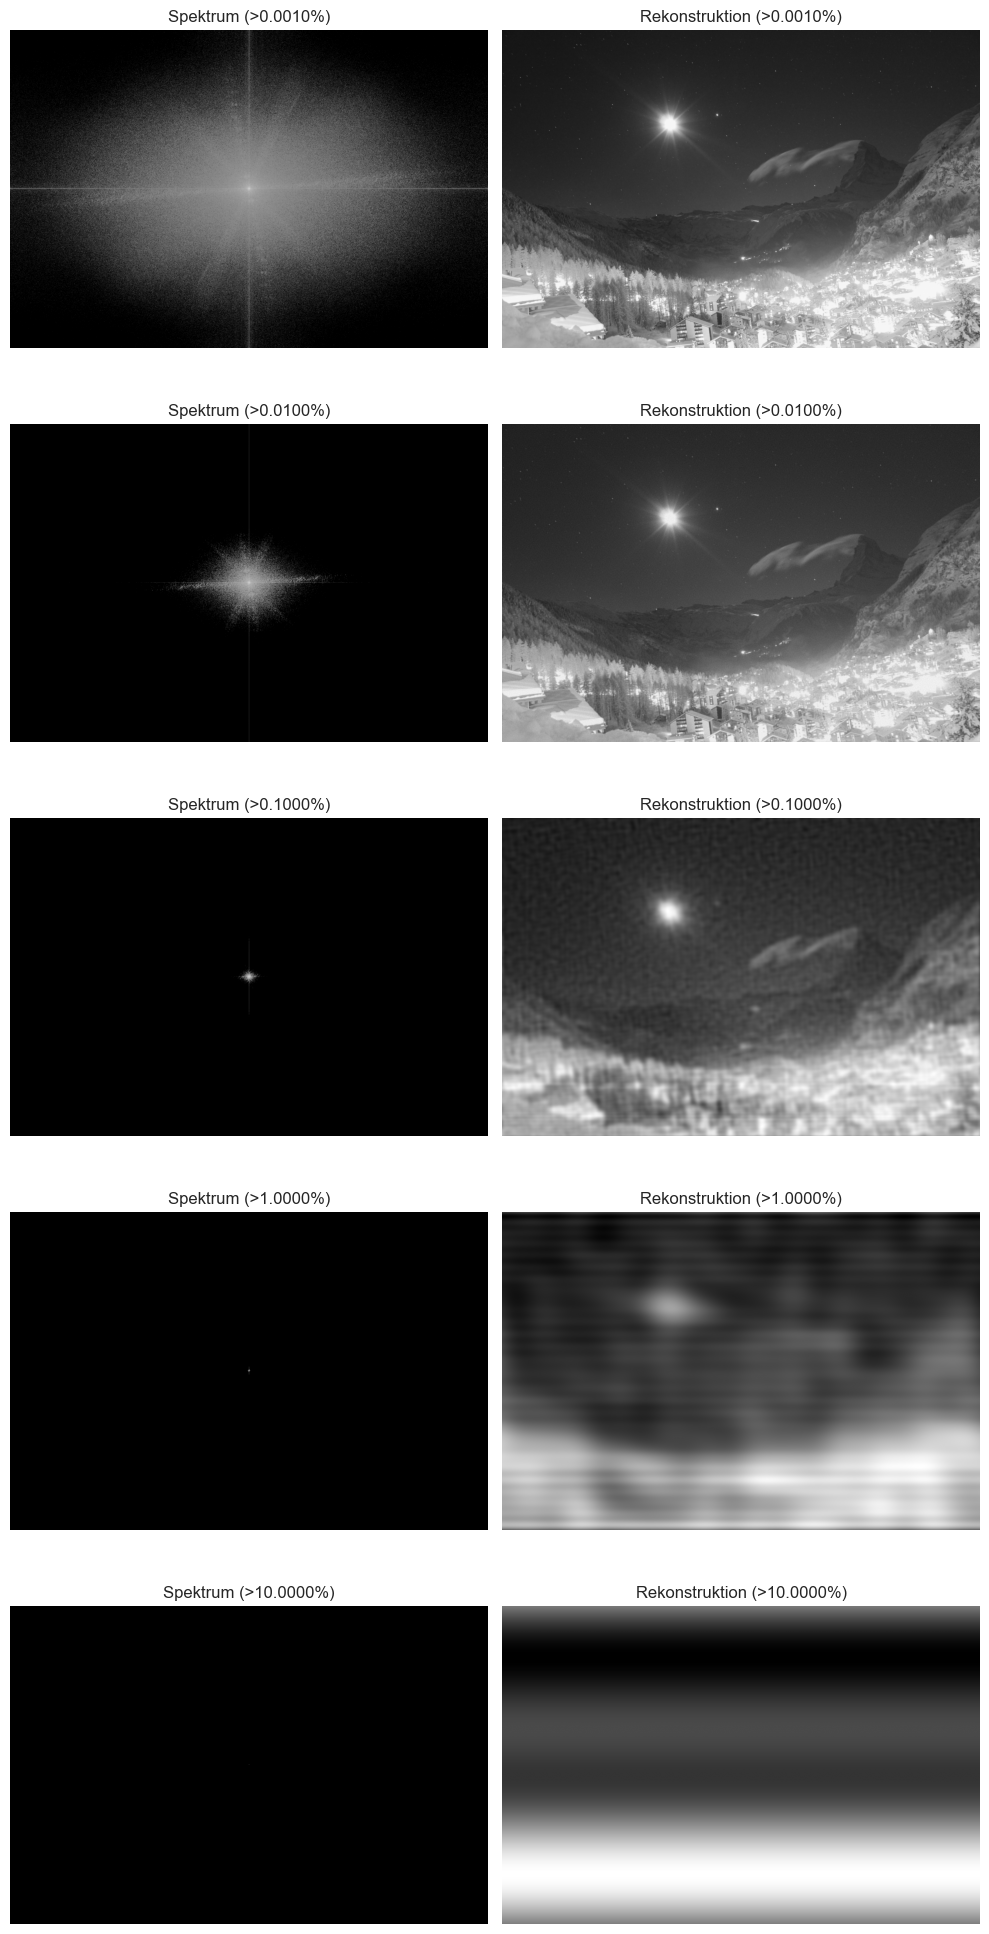

In [106]:
def filter_fft(img, threshold):
    F = fft2(img)
    F_shift = fftshift(F)
    mag = np.abs(F_shift)
    max_val = mag.max()

    # Schwellenwertmaske
    mask = mag >= threshold * max_val
    F_filtered = F_shift * mask

    # Log-Spektrum nur zur Anzeige
    log_spectrum = np.log1p(np.abs(F_filtered))

    # Rück-Transformation
    F_inv = ifft2(ifftshift(F_filtered))
    reconstructed = np.real(F_inv)
    return reconstructed, log_spectrum
#    return np.clip(reconstructed, 0, 1), log_spectrum

def display_recon(img, thresholds):
    num_thresholds = len(thresholds)
    fig, axes = plt.subplots(num_thresholds, 2, figsize=(10, 4 * num_thresholds), sharex=True, sharey=True)

    for i, t in enumerate(thresholds):
        recon_img, spectrum = filter_fft(img, t)

        axes[i, 0].imshow(spectrum, cmap='gray')
        axes[i, 0].set_title(f"Spektrum (>{t*100:.4f}%)")
        axes[i, 0].axis("off")

        if np.max(recon_img) > 0:
            img_disp = recon_img / np.max(recon_img)
        else:
            img_disp = recon_img
        
        axes[i, 1].imshow(img_disp, cmap='gray')
        axes[i, 1].set_title(f"Rekonstruktion (>{t*100:.4f}%)")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Aufruf
thresholds = [0.00001, 0.0001, 0.001, 0.01, 0.1]  # relative Amplituden-Schwellen
display_recon(img, thresholds)

## 4c) Relative Fehler

### Aufgabe

Berechnen Sie den Fehler (Aufgabe 1) zwischen rekonstruiertem und Originalbild. Wie weit können die Daten kompressiert werden, ohne einen Fehler von höchstens 1% zu überschreiten?

### Ziel

Das Ziel dieser Aufgabe ist es, die **Qualität der rekonstruierten Bilder** (aus Aufgabe 4b) quantitativ zu bewerten.  
Hierzu wird der **relative Fehler** zwischen dem Originalbild und den rekonstruierten Bildern berechnet – analog zur Definition in Aufgabe 1:

$$
\text{Relativer Fehler} = \frac{ \| f_{\text{original}} - f_{\text{rekonstruiert}} \|_2 }{ \| f_{\text{original}} \|_2 }
$$

### Vorgehen

1. Für jede gewählte Schwelle $t$ wird das Bild rekonstruiert.
2. Der relative Fehler zwischen Original und rekonstruiertem Bild wird berechnet.
3. In einem separaten Schritt wird der **grösste Schwellenwert $t$** ermittelt, bei dem der Fehler noch **unter 1%** liegt.

### Ergebnisse

#### Fehleranalyse pro Schwelle:
- Schwelle: 0.0010%, Fehler: 1.0377% 
- Schwelle: 0.0100%, Fehler: 4.2592% 
- Schwelle: 0.1000%, Fehler: 9.6521% 
- Schwelle: 1.0000%, Fehler: 16.5793% 
- Schwelle: 10.0000%, Fehler: 31.8039%

#### Schwellenwertsuche:

Suche nach grösstem t für maximal 1% Verlust. 
Startwert: 0.00100%, Schrittgrösse: 0.00100% 
- Schwelle: 0.00100%, Fehler: 1.0377% 
- Schwelle: 0.00099%, Fehler: 1.0274% 
- Schwelle: 0.00098%, Fehler: 1.0170% 
- Schwelle: 0.00097%, Fehler: 1.0065% 
- Schwelle: 0.00096%, Fehler: 0.9962% 
 
Gesuchter Threshold: 0.00096%

### Interpretation

Bereits ein sehr kleiner Teil des Spektrums (ca. **0.00096%** der stärksten Frequenzanteile) genügt, um das Bild mit weniger als **1% Fehler** zu rekonstruieren.  
Dies unterstreicht das enorme **Komprimierungspotenzial** der Fourier-Darstellung für Bilder:

- Ein Grossteil der Bildinformation steckt in **sehr wenigen niederfrequenten Komponenten**.
- Die **hohen Frequenzen** tragen nur marginal zur globalen Struktur bei, dominieren aber die Detailtreue.

Diese Erkenntnis bildet eine Grundlage für **verlustbehaftete Bildkompression**, wie sie etwa in JPEG verwendet wird.

### Bewertungskriterien

23) Fehler wurde korrekt berechnet.

*Siehe Output oder Unterkapitel "Ergebnisse".*

24) Maximale mögliche Kompression wurde korrekt und leicht nachvollziehbar bestimmt.

*Siehe Output oder Unterkapitel "Ergebnisse".*

In [107]:
def rel_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed) / np.linalg.norm(original)

print("Fehleranalyse pro Schwelle:")
for t in thresholds:
    recon, _ = filter_fft(img, t)
    err = rel_error(img, recon)
    print(f"Schwelle: {t*100:.4f}%, Fehler: {err:.4%}")
    
t = 0.00001
schrittgroesse = 0.0000001
print("\nSuche nach grösstem t für maximal 1% Verlust.")
print(f"Startwert: {t*100:.5f}%, Schrittgrösse: {schrittgroesse*100:.5%}")
while t > 0:
    recon, _ = filter_fft(img, t)
    err = rel_error(img, recon)
    print(f"Schwelle: {t*100:.5f}%, Fehler: {err:.4%}")
    if err < 0.01:
        print(f"Gesuchter Threshold: {t*100:.5f}%")
        break
    t -= schrittgroesse
    

Fehleranalyse pro Schwelle:
Schwelle: 0.0010%, Fehler: 1.0377%
Schwelle: 0.0100%, Fehler: 4.2592%
Schwelle: 0.1000%, Fehler: 9.6521%
Schwelle: 1.0000%, Fehler: 16.5793%
Schwelle: 10.0000%, Fehler: 31.8039%

Suche nach grösstem t für maximal 1% Verlust.
Startwert: 0.00100%, Schrittgrösse: 0.00100%
Schwelle: 0.00100%, Fehler: 1.0377%
Schwelle: 0.00099%, Fehler: 1.0274%
Schwelle: 0.00098%, Fehler: 1.0170%
Schwelle: 0.00097%, Fehler: 1.0065%
Schwelle: 0.00096%, Fehler: 0.9962%
Gesuchter Threshold: 0.00096%


# Zusammenfassung


# Anhang



# Weitere Bewertungskriterien

## Präsentation, Kommunikation und Verständlichkeit

25) Das Notebook ist übersichtlich strukturiert und bietet eine Leseführung.

*Strukturiert nach Aufgabenstellung, Kapitelauswahl über Navigation möglich. Leseführung via prägnante Unterkapitel.*

26) Die Ergebnisse werden gut verständlich kommuniziert und kritisch evaluiert.

*In Aufgaben mit relevanten Ergebnissen werden diese in spezifischen Unterkapiteln diskutiert und idR in einem kurzen Fazit zusammengefasst. Kritische Evaluation vorhanden.*

27) Die Grafiken sind vollständig beschriftet und ohne weitere Erläuterung verständlich.

*Grafiken durchs Band ordentlich beschriftet und mit dem nötigen Fachwissen ohne weitere Erläuterung verständlich.*

28) Der Code ist gut strukturiert sowie verständlich und angemessen kommentiert.

*Ja.*

29) Die Ergebnisse werden am Ende des Notebooks so zusammengefasst, dass diese Zusammenfassung eigenständig verständlich ist.

*Siehe Kapitel "Zusammenfassung".

30) Das Lerntagebuch ist kurz und verständlich geschrieben, zeigt den Lernfortschritt auf und macht zusammen mit den Kommentaren deutlich, wie und wofür KI Tools verwendet wurden.

*Siehe Anhang.*

31) Screenshot und Reflexion über KI Nutzung sind aufschlussreich.

*Siehe Anhang.*

## Malus

32) -5 Das Notebook lässt sich nicht komplett und fehlerfrei in weniger als 5 Minuten ausführen.

*Ausführung auf Laptop in <1 Minute.*

33) -5 Der Text weist eine hohe Anzahl an grammatikalischen und Rechtschreibfehlern auf, was die Verständlichkeit erheblich beeinträchtigt.

*Nein.* 

34) -5 Die Schlussfolgerungen sind nicht durch die präsentierten Argumente und Daten gestützt oder erscheinen willkürlich.

*Nein.*

35) -5 Der Inhalt des Textes ist teilweise nicht kohärent und wirkt wie automatisch generiertes Füllmaterial ohne klaren Bezug zum Thema.

*Nein.*

## Danksagung

Danke.